In [1]:
from bs4 import BeautifulSoup
import string
import re
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import nltk as nltk
import numpy as np

# import the text corpus from disk and perform pre-processing steps

In [2]:
input_file = open(".\\data\\wiki_05", "rt", encoding="utf-8")
input_data = input_file.read()
input_file.close()

# Remove html and other tags.

In [3]:
souped_data = BeautifulSoup(input_data)

In [4]:
#combine all the documents in the corpus into a single text document
all_data = ""
for doc in souped_data.find_all('doc'):
    # remove new lines, convert to lower case and concatenate
    all_data = all_data + " " + doc.get_text().replace("\n", " ").lower()

In [5]:
# Note: we are removing punctuations.
without_punctuations = re.sub(r'[^\w\s]', ' ', all_data)

# Tokenize the text. This will get rid of extra spaces as well.

In [6]:
tokens = word_tokenize(without_punctuations)

<pre>
Q1. Unigram analysis:
 (a) Mention the total unique unigrams present in the corpus.
 (b) Plot the distribution of the unigram frequencies.
 (c) How many (most frequent) uni-grams are required to cover the 90% of the complete corpus.
</pre>

In [7]:
token_set = set(tokens)
total_number_of_unigrams = len(token_set)
print("Total number of unigrams : ", total_number_of_unigrams)
tokens_for_90_percent = round(0.9 * len(tokens))
unique_word_counter = Counter(tokens)
ordered_token_list = unique_word_counter.most_common(len(unique_word_counter.values()))
current_count = 0
token_count = 0
sorted_list_of_values = list()
for token, count in ordered_token_list:
    sorted_list_of_values.append(count)
    if(current_count < tokens_for_90_percent):
        current_count = current_count + count
        token_count = token_count + 1

print("We will need", token_count, "most used unigrams to cover 90% of tokens")

Total number of unigrams :  42040
We will need 8368 most used unigrams to cover 90% of tokens


# Exploratory data analysis
<ul>
<li>Top/Most used Words</li>
<li>Rare Words</li>
<li>Vocabulary size</li>
</ul>

# Plot the normal frequency graph unigrams

In [8]:
%matplotlib inline

def plot_frequency_graph(values, xlabel, ylabel, title, xscale='linear', yscale='linear'):
    # set graph size to 12,5 inches
    #plt.rcParams["figure.figsize"] = (12,5)
    plt.yscale(xscale)
    plt.xscale(yscale)
    plt.plot(values)
    # naming the x axis
    plt.xlabel(xlabel)
    # naming the y axis
    plt.ylabel(ylabel)

    # giving a title to  graph
    plt.title(title)

    # function to show the plot
    plt.show()

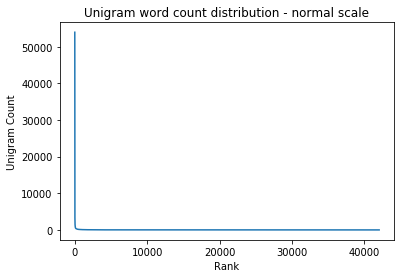

In [9]:
plot_frequency_graph(sorted_list_of_values, 'Rank', 'Unigram Count', 'Unigram word count distribution - normal scale')

# Plot the log-log frequency graph for unigrams

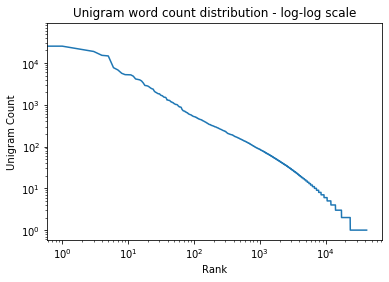

In [10]:
plot_frequency_graph(sorted_list_of_values, 'Rank', 'Unigram Count', 'Unigram word count distribution - log-log scale', 'log', 'log')

In [11]:
# collection frequency - Zipf's Law
i=0
for token, count in ordered_token_list[0:20]:
    print("Collection Frequency of ", token, " is " , 1/sorted_list_of_values[i], " appears ", count, " times.")
    i = i + 1

Collection Frequency of  the  is  1.8536368354711943e-05  appears  53948  times.
Collection Frequency of  of  is  3.948043744324687e-05  appears  25329  times.
Collection Frequency of  and  is  4.7406845548497206e-05  appears  21094  times.
Collection Frequency of  in  is  5.289605924358635e-05  appears  18905  times.
Collection Frequency of  to  is  6.543217954590067e-05  appears  15283  times.
Collection Frequency of  a  is  6.766357669666418e-05  appears  14779  times.
Collection Frequency of  is  is  0.00012923235978288964  appears  7738  times.
Collection Frequency of  as  is  0.0001465845793022574  appears  6822  times.
Collection Frequency of  was  is  0.00017618040873854828  appears  5676  times.
Collection Frequency of  by  is  0.00018971732119142478  appears  5271  times.
Collection Frequency of  with  is  0.00019073049780659929  appears  5243  times.
Collection Frequency of  for  is  0.00019193857965451057  appears  5210  times.
Collection Frequency of  that  is  0.000206483

<pre>
Q2. Bigram analysis:
 (a) Mention the total unique bigrams present in the corpus.
 (b) Plot the distribution of the bigram frequencies.
 (c) How many (most frequent) bi-grams are required to cover the 90% of the complete corpus.
</pre>

### Bigram https://en.wikipedia.org/wiki/Bigram

In [12]:
bigrams = nltk.bigrams(tokens)
bigram_list = list(bigrams)
bg_tokens_for_90_percent = round(0.9 * len(bigram_list))
print("Total bigrams = ", len(bigram_list))
bg_unique_word_counter = Counter(bigram_list)
bg_ordered_token_list = bg_unique_word_counter.most_common(len(bg_unique_word_counter.values()))
current_count = 0
token_count = 0
sorted_list_of_values = list()
for token, count in bg_ordered_token_list:
    sorted_list_of_values.append(count)
    if(current_count < bg_tokens_for_90_percent):
        current_count = current_count + count
        token_count = token_count + 1

print("We will need", token_count, "most used bigrams to cover 90%")

Total bigrams =  708044
We will need 276325 most used bigrams to cover 90%


# Plot the normal frequency graph of bigrams

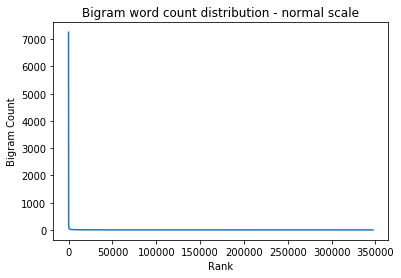

In [13]:
plot_frequency_graph(sorted_list_of_values, 'Rank', 'Bigram Count', 'Bigram word count distribution - normal scale')

# Plot log-log frequency graph for bigrams

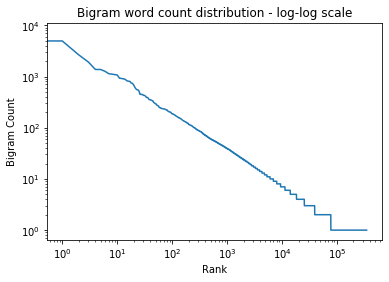

In [14]:
plot_frequency_graph(sorted_list_of_values, 'Rank', 'Bigram Count', 'Bigram word count distribution - log-log scale', 'log', 'log')

<pre>
Q3. Trigram analysis:
 (a) Mention the total unique trigrams present in the corpus.
 (b) Plot the distribution of the trigram frequencies.
 (c) How many (most frequent) tri-grams are required to cover the 90% of the complete corpus.
</pre>

### Trigram https://en.wikipedia.org/wiki/Trigram

In [15]:
trigrams = nltk.trigrams(tokens)
trigram_list = list(trigrams)
tg_tokens_for_90_percent = round(0.9 * len(trigram_list))
print("Total trigrams = ", len(trigram_list))
tg_unique_word_counter = Counter(trigram_list)
tg_ordered_token_list = tg_unique_word_counter.most_common(len(tg_unique_word_counter.values()))
current_count = 0
token_count = 0
sorted_list_of_values = list()
for token, count in tg_ordered_token_list:
    sorted_list_of_values.append(count)
    if(current_count < tg_tokens_for_90_percent):
        current_count = current_count + count
        token_count = token_count + 1

print("We will need", token_count, "most used trigrams to cover 90%")

Total trigrams =  708043
We will need 525123 most used trigrams to cover 90%


# Plot the normal frequency graph of trigrams

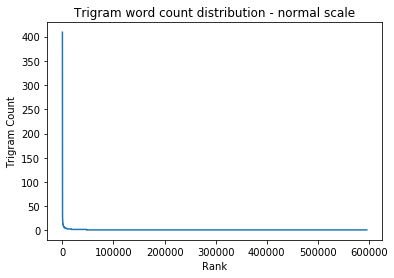

In [16]:
plot_frequency_graph(sorted_list_of_values, 'Rank', 'Trigram Count', 'Trigram word count distribution - normal scale')

# Plot the log-log frequency graph for trigrams

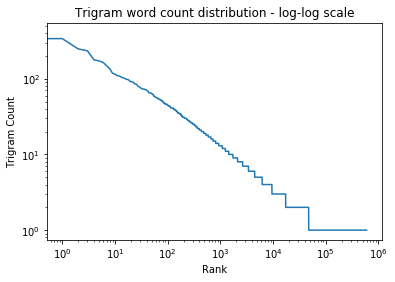

In [17]:
plot_frequency_graph(sorted_list_of_values, 'Rank', 'Trigram Count', 'Trigram word count distribution - log-log scale', 'log', 'log')

# Perform stemming on the tokens
<pre>Q4. Repeat Q1, Q2, and Q3 after performing the stemming process on the tokens.</pre>

### Stemming https://en.wikipedia.org/wiki/Stemming
### Online Stemmer https://text-processing.com/demo/stem/

In [18]:
stemmer = nltk.stem.porter.PorterStemmer()
#stemmer = nltk.stem.snowball.SnowballStemmer("english")
v_stem = np.vectorize(stemmer.stem)

In [19]:
stemmed_tokens = v_stem(tokens)

<pre> Repeat Q1 after stemming
 (a) Mention the total unique unigrams present in the corpus.
 (b) Plot the distribution of the unigram frequencies.
 (c) How many (most frequent) uni-grams are required to cover the 90% of the complete corpus.
</pre>

In [20]:
token_set = set(stemmed_tokens)
total_number_of_unigrams = len(token_set)
print("Total number of unigrams : ", total_number_of_unigrams)
tokens_for_90_percent = round(0.9 * len(stemmed_tokens))
unique_word_counter = Counter(stemmed_tokens)
ordered_token_list = unique_word_counter.most_common(len(unique_word_counter.values()))
current_count = 0
token_count = 0
sorted_list_of_values = list()
for token, count in ordered_token_list:
    sorted_list_of_values.append(count)
    if(current_count < tokens_for_90_percent):
        current_count = current_count + count
        token_count = token_count + 1

print("We will need", token_count, "most used unigrams to cover 90% of tokens")

Total number of unigrams :  30287
We will need 4414 most used unigrams to cover 90% of tokens


# Plot normal frequency graph for stemmed unigrams

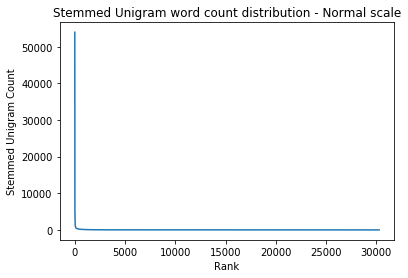

In [21]:
plot_frequency_graph(sorted_list_of_values, 'Rank', 'Stemmed Unigram Count', 'Stemmed Unigram word count distribution - Normal scale')

# Plot the log-log frequency graph for stemmed unigrams

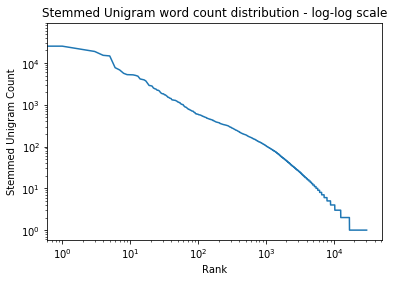

In [22]:
plot_frequency_graph(sorted_list_of_values, 'Rank', 'Stemmed Unigram Count', 'Stemmed Unigram word count distribution - log-log scale', 'log', 'log')

<pre>
Repeat Q2. Bigram analysis on stemmed data:
 (a) Mention the total unique bigrams present in the corpus.
 (b) Plot the distribution of the bigram frequencies.
 (c) How many (most frequent) bi-grams are required to cover the 90% of the complete corpus.
</pre>

In [23]:
bigrams = nltk.bigrams(stemmed_tokens)
bigram_list = list(bigrams)
bg_tokens_for_90_percent = round(0.9 * len(bigram_list))
print("Total bigrams = ", len(bigram_list))
bg_unique_word_counter = Counter(bigram_list)
bg_ordered_token_list = bg_unique_word_counter.most_common(len(bg_unique_word_counter.values()))
current_count = 0
token_count = 0
sorted_list_of_values = list()
for token, count in bg_ordered_token_list:
    sorted_list_of_values.append(count)
    if(current_count < bg_tokens_for_90_percent):
        current_count = current_count + count
        token_count = token_count + 1

print("We will need", token_count, "most used bigrams to cover 90%")

Total bigrams =  708044
We will need 246031 most used bigrams to cover 90%


# Plot the normal frequncy graph of stemmed bigrams

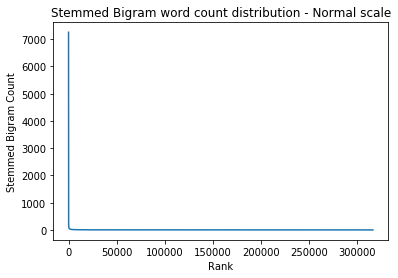

In [24]:
plot_frequency_graph(sorted_list_of_values, 'Rank', 'Stemmed Bigram Count', 'Stemmed Bigram word count distribution - Normal scale')

# Plot the log-log frequncy of stemmed bigrams

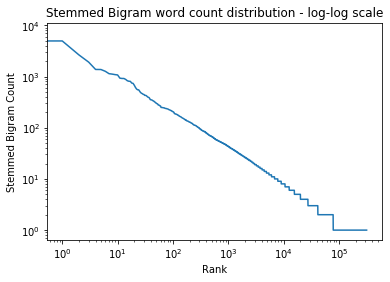

In [25]:
plot_frequency_graph(sorted_list_of_values, 'Rank', 'Stemmed Bigram Count', 'Stemmed Bigram word count distribution - log-log scale', 'log', 'log')

<pre>
Repeat Q3. Trigram analysis for stemmed words:
 (a) Mention the total unique trigrams present in the corpus.
 (b) Plot the distribution of the trigram frequencies.
 (c) How many (most frequent) tri-grams are required to cover the 90% of the complete corpus.
</pre>

In [26]:
trigrams = nltk.trigrams(stemmed_tokens)
trigram_list = list(trigrams)
tg_tokens_for_90_percent = round(0.9 * len(trigram_list))
print("Total trigrams = ", len(trigram_list))
tg_unique_word_counter = Counter(trigram_list)
tg_ordered_token_list = tg_unique_word_counter.most_common(len(tg_unique_word_counter.values()))
current_count = 0
token_count = 0
sorted_list_of_values = list()
for token, count in tg_ordered_token_list:
    sorted_list_of_values.append(count)
    if(current_count < tg_tokens_for_90_percent):
        current_count = current_count + count
        token_count = token_count + 1

print("We will need", token_count, "most used trigrams to cover 90%")

Total trigrams =  708043
We will need 515797 most used trigrams to cover 90%


# Plot the normal frequency grap of stemmed trigrams

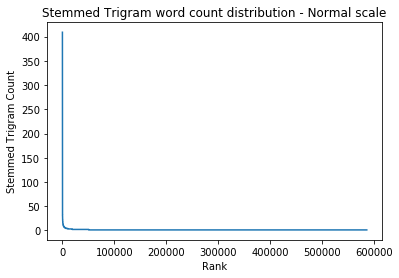

In [27]:
plot_frequency_graph(sorted_list_of_values, 'Rank', 'Stemmed Trigram Count', 'Stemmed Trigram word count distribution - Normal scale')

# Plot the log-log frequency graph of stemmed trigrams

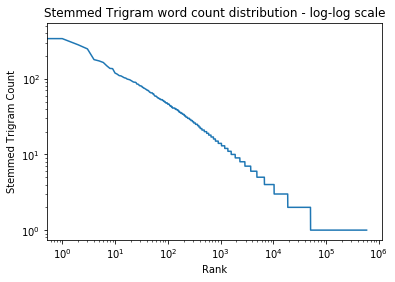

In [28]:
plot_frequency_graph(sorted_list_of_values, 'Rank', 'Stemmed Trigram Count', 'Stemmed Trigram word count distribution - log-log scale', 'log', 'log')